<a href="https://colab.research.google.com/github/sanagalanandini/dl-4/blob/main/dl_lab1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


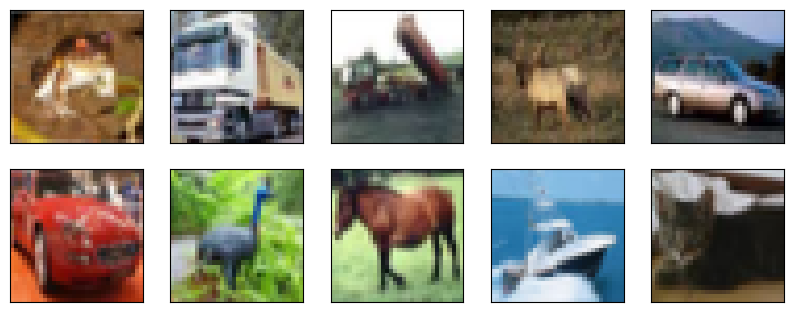

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])

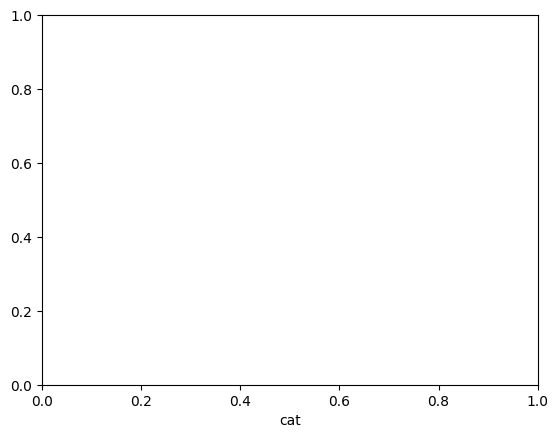

In [ ]:
plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),activation='relu',
input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Epoch 1/5
1563/1563 [==============================] - 84s 53ms/step - loss: 1.5053 - accuracy: 0.4505 - val_loss: 1.3293 - val_accuracy: 0.5192
Epoch 2/5
1563/1563 [==============================] - 82s 52ms/step - loss: 1.1490 - accuracy: 0.5920 - val_loss: 1.0547 - val_accuracy: 0.6273
Epoch 3/5
1563/1563 [==============================] - 79s 51ms/step - loss: 0.9886 - accuracy: 0.6494 - val_loss: 0.9921 - val_accuracy: 0.6505
Epoch 4/5
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8840 - accuracy: 0.6885 - val_loss: 0.8974 - val_accuracy: 0.6874
Epoch 5/5
1563/1563 [==============================] - 82s 53ms/step - loss: 0.8056 - accuracy: 0.7153 - val_loss: 0.9088 - val_accuracy: 0.6829
313/313 - 4s - loss: 0.9088 - accuracy: 0.6829 - 4s/epoch - 12ms/step
0.6829000115394592


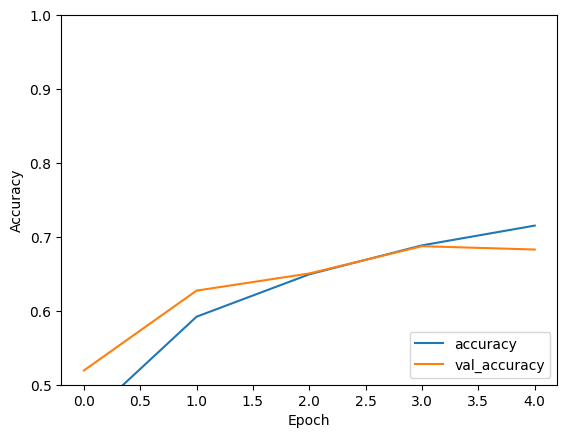

In [ ]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)